<a href="https://colab.research.google.com/github/dian-wijayanti/DOKUMEN-TESIS/blob/main/Dokumentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis Dataset, Karakteristik Data, Implikasi Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# File akan tersedia di /content/drive/My Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Jika menggunakan Google Colab, mount Google Drive terlebih dahulu:
from google.colab import drive
drive.mount('/content/drive')

# Import pustaka yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (Modul files dari Colab tidak digunakan lagi karena kita tidak menyimpan grafik)
# from google.colab import files

# Mengatur style visualisasi (digunakan untuk grafik jika diperlukan, tapi tidak wajib)
sns.set(style="whitegrid")

# Path file dataset (dengan ekstensi CSV)
file_path = '/content/drive/My Drive/DATA/dataset_Google-Maps-Reviews-Scraper_2025-01-15_06-02-12-301.csv'

# Membaca file CSV dengan penanganan error jika file tidak ditemukan
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("File tidak ditemukan. Pastikan path sudah benar.")
    raise

# Menampilkan informasi dasar dataset
print("Ukuran dataset:", df.shape)
print("\nBeberapa baris awal:")
print(df.head())

# Menampilkan informasi tipe data dan nilai yang hilang
print("\nInformasi dataset:")
df.info()

print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif:")
print(df.describe())

# 1. Distribusi Stars dalam bentuk tabel
if 'stars' in df.columns:
    print("\nDistribusi Stars:")
    stars_count = df['stars'].value_counts().sort_index()
    print(stars_count)
else:
    print("\nKolom 'stars' tidak ditemukan dalam dataset.")

# 2. Distribusi Panjang Review dalam bentuk tabel
if 'text' in df.columns:
    # Menghitung panjang review dalam jumlah kata
    df['review_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))
    print("\nDistribusi Panjang Review (Jumlah Kata):")
    # Membuat distribusi dengan membagi panjang review ke dalam 10 bin
    review_length_bins = pd.cut(df['review_length'], bins=10)
    review_length_distribution = review_length_bins.value_counts().sort_index()
    print(review_length_distribution)
else:
    print("\nKolom 'text' tidak ditemukan dalam dataset.")

# 3. Jumlah Review per Tahun dalam bentuk tabel
if 'publishedAtDate' in df.columns:
    # Konversi kolom publishedAtDate ke format datetime dengan timezone UTC
    df['publishedAtDate'] = pd.to_datetime(df['publishedAtDate'], utc=True, errors='coerce')

    # Mengurutkan berdasarkan tanggal (nilai NaT tetap dipertahankan)
    df_sorted = df.sort_values('publishedAtDate')

    print("\nJumlah Review per Tahun (Berdasarkan publishedAtDate):")
    # Menggunakan resample untuk menghitung jumlah review per tahun
    reviews_per_year = df_sorted.set_index('publishedAtDate')['text'].resample('Y').count()
    print(reviews_per_year)
else:
    print("\nKolom 'publishedAtDate' tidak tersedia di dataset.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ukuran dataset: (1243, 68)

Beberapa baris awal:
                                             address            categories/0  \
0  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
1  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
2  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
3  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
4  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   

             categoryName                   cid              city countryCode  \
0  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
1  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
2  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
3  Rumah Sakit Pe

<ipython-input-54-9f520831df50>:72: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  reviews_per_year = df_sorted.set_index('publishedAtDate')['text'].resample('Y').count()


#Pemilihan Kolom dari Dataset

In [55]:
# Import library yang diperlukan
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Tentukan path file CSV
file_path = '/content/drive/MyDrive/DATA/dataset_Google-Maps-Reviews-Scraper_2025-01-15_06-02-12-301.csv'

# Baca dataset dengan penanganan error
try:
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error saat membaca file {file_path}: {e}")
    raise

# Tampilkan jumlah kolom sebelum
print("Jumlah kolom sebelum:", len(df.columns))
print("Kolom sebelum:", list(df.columns))

# Pilih hanya 3 kolom yang diinginkan
selected_columns = ['publishedAtDate', 'stars', 'text']

# Cek apakah semua kolom yang diinginkan ada dalam dataset
missing_columns = [col for col in selected_columns if col not in df.columns]
if missing_columns:
    print(f"Kolom berikut tidak ditemukan dalam dataset: {missing_columns}")
else:
    df_selected = df[selected_columns]

    # Tampilkan jumlah kolom sesudah
    print("\nJumlah kolom sesudah:", len(df_selected.columns))
    print("Kolom sesudah:", list(df_selected.columns))

    # Tampilkan 5 baris pertama untuk mengecek hasil
    print("\nDataset setelah pemilihan kolom:")
    print(df_selected.head())

    # Simpan hasil ke file baru
    output_path = '/content/drive/MyDrive/DATA/processed_reviews.csv'
    df_selected.to_csv(output_path, index=False)
    print(f"\nData telah disimpan ke: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah kolom sebelum: 68
Kolom sebelum: ['address', 'categories/0', 'categoryName', 'cid', 'city', 'countryCode', 'fid', 'imageUrl', 'isAdvertisement', 'isLocalGuide', 'likesCount', 'location/lat', 'location/lng', 'name', 'neighborhood', 'permanentlyClosed', 'placeId', 'postalCode', 'price', 'publishAt', 'publishedAtDate', 'rating', 'responseFromOwnerDate', 'responseFromOwnerText', 'reviewId', 'reviewImageUrls/0', 'reviewImageUrls/1', 'reviewImageUrls/2', 'reviewImageUrls/3', 'reviewImageUrls/4', 'reviewImageUrls/5', 'reviewImageUrls/6', 'reviewImageUrls/7', 'reviewImageUrls/8', 'reviewImageUrls/9', 'reviewImageUrls/10', 'reviewImageUrls/11', 'reviewImageUrls/12', 'reviewImageUrls/13', 'reviewImageUrls/14', 'reviewImageUrls/15', 'reviewImageUrls/16', 'reviewImageUrls/17', 'reviewImageUrls/18', 'reviewImageUrls/19', 'reviewImageUrls/20', 'reviewImageUrls/21', 

#Penghapusan Data Duplikat

In [56]:
import pandas as pd
import re
from google.colab import drive

# Mount Google Drive (gunakan force_remount=True jika diperlukan)
drive.mount('/content/drive', force_remount=False)

# Tentukan path file dataset
input_path = '/content/drive/MyDrive/DATA/processed_reviews.csv'

# Baca dataset dengan penanganan error jika file tidak ditemukan
try:
    df = pd.read_csv(input_path)
except Exception as e:
    print(f"Error saat membaca file {input_path}: {e}")
    raise

print("Jumlah data sebelum normalisasi dan penghapusan duplikat:", len(df))

# Fungsi normalisasi teks: mengubah huruf kecil, menghapus tanda baca, dan menghilangkan spasi berlebih
def normalize_text(text):
    # Cek apakah nilai tersebut NaN atau bukan string
    if pd.isna(text) or not isinstance(text, str):
        return ""  # Mengembalikan string kosong untuk memastikan konsistensi
    # Ubah ke huruf kecil
    text = text.lower()
    # Hapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Terapkan normalisasi pada kolom 'text' jika kolom tersebut ada
if 'text' in df.columns:
    df['text'] = df['text'].apply(normalize_text)
else:
    print("Kolom 'text' tidak ditemukan di dataset.")

# Identifikasi baris yang merupakan duplikat (semua instance duplikat)
duplicate_mask = df.duplicated(subset=['text'], keep=False)
df_duplicates = df[duplicate_mask]

print("\nContoh data yang merupakan duplikat sebelum penghapusan:")
if not df_duplicates.empty:
    print(df_duplicates.head(5))
else:
    print("Tidak ditemukan data duplikat sebelum penghapusan.")

# Hapus duplikat berdasarkan kolom 'text' (menyisakan satu instance untuk tiap nilai yang sama)
df_no_duplicates = df.drop_duplicates(subset=['text'])
print("\nJumlah data setelah penghapusan duplikat:", len(df_no_duplicates))

# Ambil contoh baris unik (hasil penghapusan) untuk teks yang sebelumnya duplikat
duplicated_texts = df_duplicates['text'].unique()
df_duplicates_after = df_no_duplicates[df_no_duplicates['text'].isin(duplicated_texts)]

print("\nContoh data yang tersisa (unik) setelah penghapusan duplikat untuk teks duplikat:")
if not df_duplicates_after.empty:
    print(df_duplicates_after.head(5))
else:
    print("Tidak ditemukan data duplikat setelah penghapusan (karena sebelumnya tidak ada duplikat).")

# Simpan data tanpa duplikat ke file CSV baru
output_path = '/content/drive/MyDrive/DATA/clean_normalized_no_duplicates_reviews.csv'
try:
    df_no_duplicates.to_csv(output_path, index=False)
    print(f"\nData telah disimpan ke: {output_path}")
except Exception as e:
    print(f"Error saat menyimpan file ke {output_path}: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data sebelum normalisasi dan penghapusan duplikat: 1243

Contoh data yang merupakan duplikat sebelum penghapusan:
             publishedAtDate  stars  \
14  2024-12-27T12:07:18.840Z      5   
26  2024-12-07T06:01:39.842Z      5   
35  2024-11-27T11:09:52.436Z      4   
39  2024-11-24T13:49:27.844Z      5   
45  2024-11-16T03:34:02.813Z      5   

                                                 text  
14                                                     
26  saya belajar banyak hal selama menjalani koas ...  
35                                     pelayanan baik  
39                                                     
45                                                     

Jumlah data setelah penghapusan duplikat: 884

Contoh data yang tersisa (unik) setelah penghapusan duplikat untuk teks duplikat:
              publishedAtDate  stars  \
14   2024

# Penghapusan Ulasan Kosong dan NaN

In [57]:
import pandas as pd
import re
from google.colab import drive

# 1. Mount Google Drive (gunakan force_remount jika diperlukan)
drive.mount('/content/drive', force_remount=False)

# 2. Baca dataset dengan penanganan error jika file tidak ditemukan
input_path = '/content/drive/MyDrive/DATA/processed_reviews.csv'
try:
    df = pd.read_csv(input_path)
except Exception as e:
    print(f"Error saat membaca file {input_path}: {e}")
    raise

print("Jumlah data sebelum normalisasi dan penghapusan duplikat:", len(df))

# 3. Fungsi normalisasi teks
def normalize_text(text):
    # Jika nilai NaN atau bukan string, kembalikan string kosong
    if pd.isna(text) or not isinstance(text, str):
        return ""
    # Ubah ke huruf kecil, hapus tanda baca, dan hapus spasi berlebih
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Terapkan normalisasi pada kolom 'text' jika kolom tersebut ada
if 'text' in df.columns:
    df['text'] = df['text'].apply(normalize_text)
else:
    print("Kolom 'text' tidak ditemukan di dataset.")

# 4. Penghapusan Duplikat
# Identifikasi duplikat berdasarkan kolom 'text'
duplicate_mask = df.duplicated(subset=['text'], keep=False)
df_duplicates = df[duplicate_mask]

print("\nContoh data yang merupakan duplikat sebelum penghapusan:")
if not df_duplicates.empty:
    print(df_duplicates.head(5))
else:
    print("Tidak ditemukan data duplikat sebelum penghapusan.")

# Hapus duplikat (menyisakan satu instance untuk tiap nilai yang sama)
df_no_duplicates = df.drop_duplicates(subset=['text'])
print("\nJumlah data setelah penghapusan duplikat:", len(df_no_duplicates))

# 5. Tampilkan data baris 13-17 sebelum penghapusan ulasan kosong/NaN
print("\nData baris 13-17 sebelum penghapusan ulasan kosong/NaN:")
try:
    print(df_no_duplicates.loc[13:17])
except KeyError:
    print("Beberapa indeks (13-17) tidak ditemukan pada df_no_duplicates.")

# 6. Penghapusan Ulasan Kosong dan NaN
# Pastikan setelah normalisasi, nilai kosong ('') dianggap sebagai ulasan kosong
df_clean = df_no_duplicates[df_no_duplicates['text'].str.strip() != '']
print("\nJumlah data setelah penghapusan ulasan kosong/NaN:", len(df_clean))

# 7. Tampilkan data baris 13-17 setelah penghapusan ulasan kosong/NaN
print("\nData baris 13-17 setelah penghapusan ulasan kosong/NaN:")
try:
    print(df_clean.loc[13:17])
except KeyError:
    print("Beberapa indeks (13-17) tidak ditemukan pada df_clean.")

# 8. Simpan data final yang sudah bersih ke file CSV baru dengan penanganan error
output_path_clean = '/content/drive/MyDrive/DATA/clean_normalized_no_duplicates_nonempty_reviews.csv'
try:
    df_clean.to_csv(output_path_clean, index=False)
    print(f"\nData telah disimpan ke: {output_path_clean}")
except Exception as e:
    print(f"Error saat menyimpan file ke {output_path_clean}: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data sebelum normalisasi dan penghapusan duplikat: 1243

Contoh data yang merupakan duplikat sebelum penghapusan:
             publishedAtDate  stars  \
14  2024-12-27T12:07:18.840Z      5   
26  2024-12-07T06:01:39.842Z      5   
35  2024-11-27T11:09:52.436Z      4   
39  2024-11-24T13:49:27.844Z      5   
45  2024-11-16T03:34:02.813Z      5   

                                                 text  
14                                                     
26  saya belajar banyak hal selama menjalani koas ...  
35                                     pelayanan baik  
39                                                     
45                                                     

Jumlah data setelah penghapusan duplikat: 884

Data baris 13-17 sebelum penghapusan ulasan kosong/NaN:
             publishedAtDate  stars  \
13  2024-12-28T02:54:05.789Z      4 

#Penyaringan Ulasan Berdasarkan Periode Waktu

In [59]:
import pandas as pd
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Baca dataset yang sudah dibersihkan
input_path = '/content/drive/MyDrive/DATA/clean_normalized_no_duplicates_nonempty_reviews.csv'
try:
    df = pd.read_csv(input_path)
except Exception as e:
    print(f"Error saat membaca file {input_path}: {e}")
    raise

print("Jumlah data sebelum penyaringan periode waktu:", len(df))

# 3. Penyaringan Berdasarkan Periode Waktu
if 'publishedAtDate' in df.columns:
    try:
        # Konversi ke datetime dengan timezone UTC
        df['publishedAtDate'] = pd.to_datetime(df['publishedAtDate'], utc=True)
    except Exception as e:
        print(f"Error saat konversi 'publishedAtDate': {e}")
        raise
else:
    print("Kolom 'publishedAtDate' tidak ditemukan dalam dataset.")
    df['publishedAtDate'] = pd.NaT

# Tentukan batas akhir periode (31 Desember 2024) dengan timezone UTC
end_date = pd.to_datetime('2024-12-31').tz_localize('UTC')

# Filter data sampai dengan 31 Desember 2024
df_filtered = df[df['publishedAtDate'] <= end_date]

# Tampilkan informasi hasil filtering
print("\nPeriode waktu yang diambil:")
if not df_filtered.empty:
    print(f"Dari: {df_filtered['publishedAtDate'].min().strftime('%d %B %Y')}")
else:
    print("Data kosong setelah filter periode!")
print(f"Sampai: {end_date.strftime('%d %B %Y')}")

print("\nJumlah data:")
print(f"Total data sebelum filter waktu: {len(df)}")
print(f"Total data setelah filter waktu: {len(df_filtered)}")
print(f"Jumlah data yang difilter: {len(df) - len(df_filtered)}")
print(f"Persentase data terfilter: {((len(df) - len(df_filtered)) / len(df) * 100):.1f}%")

# Simpan hasil filtering ke file baru
output_path = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024.csv'
try:
    df_filtered.to_csv(output_path, index=False)
    print("\nData telah disimpan ke:", output_path)
except Exception as e:
    print(f"Error saat menyimpan file ke {output_path}: {e}")

# Tampilkan distribusi ulasan per tahun dari data yang telah difilter
if not df_filtered.empty:
    yearly_distribution = df_filtered['publishedAtDate'].dt.year.value_counts().sort_index()
    print("\nDistribusi ulasan per tahun:")
    for year, count in yearly_distribution.items():
        print(f"Tahun {year}: {count} ulasan")
else:
    print("Tidak ada data untuk ditampilkan distribusinya.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data sebelum penyaringan periode waktu: 883

Periode waktu yang diambil:
Dari: 04 October 2016
Sampai: 31 December 2024

Jumlah data:
Total data sebelum filter waktu: 883
Total data setelah filter waktu: 873
Jumlah data yang difilter: 10
Persentase data terfilter: 1.1%

Data telah disimpan ke: /content/drive/MyDrive/DATA/filtered_dataset_until_2024.csv

Distribusi ulasan per tahun:
Tahun 2016: 2 ulasan
Tahun 2017: 21 ulasan
Tahun 2018: 46 ulasan
Tahun 2019: 41 ulasan
Tahun 2020: 34 ulasan
Tahun 2021: 51 ulasan
Tahun 2022: 187 ulasan
Tahun 2023: 115 ulasan
Tahun 2024: 376 ulasan


#Preprocessing Data

In [60]:
from google.colab import drive
drive.mount('/content/drive')

# Ganti path sesuai lokasi file Anda di Google Drive
df = pd.read_csv('/content/drive/MyDrive/DATA/filtered_dataset_until_2024.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# Jika belum terinstall, pastikan paket PySastrawi dan emoji sudah terinstall
!pip install PySastrawi emoji

import os
import re
import emoji
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Unduh resource NLTK (jika belum pernah diunduh)
nltk.download('punkt')
nltk.download('stopwords')
# nltk.download('punkt_tab')  # Baris ini bisa dihapus jika resource tidak diperlukan

# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Daftar stopwords manual untuk bahasa Indonesia
stop_words_indonesian = {
    'yang', 'dengan', 'pada', 'dan', 'di', 'ke', 'untuk', 'ini', 'itu', 'tidak', 'ada',
    'saya', 'kamu', 'kita', 'kami', 'mereka', 'atau', 'seperti', 'juga', 'akan', 'dari',
    'oleh', 'sebagai', 'karena', 'saat', 'bisa', 'hanya', 'sudah', 'belum', 'lagi', 'jadi',
    'harus', 'agar', 'lebih', 'banyak', 'kalau', 'bagi', 'dalam', 'tersebut'
}

def remove_special_characters(text):
    """Menghapus karakter khusus dan angka dari teks."""
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_emoji(text):
    """Menghapus emoji dari teks."""
    return emoji.replace_emoji(text, replace='')

def remove_urls(text):
    """Menghapus URL dari teks."""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def normalize_alay(text):
    """Normalisasi kata tidak baku (alay) ke bentuk yang standar."""
    alay_dict = {
        'dgn': 'dengan',
        'yg': 'yang',
        'utk': 'untuk',
        'tdk': 'tidak',
        'krn': 'karena',
        'trs': 'terus',
        'gk': 'tidak',
        'ga': 'tidak',
        'jd': 'jadi',
        'jgn': 'jangan',
        'tp': 'tapi',
        'sdh': 'sudah',
        'blm': 'belum',
        'bgt': 'banget',
        'sy': 'saya',
        'org': 'orang'
    }
    words = text.split()
    return ' '.join([alay_dict.get(word.lower(), word) for word in words])

def remove_stopwords(text):
    """Menghapus stopwords berdasarkan daftar yang telah ditentukan."""
    words = word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words_indonesian])

def lemmatize_text(text):
    """Melakukan stemming (lemmatisasi) menggunakan Sastrawi."""
    return stemmer.stem(text)

def full_preprocessing(text):
    """Pipeline preprocessing lengkap untuk teks."""
    if pd.isna(text) or not isinstance(text, str):
        return text

    # Hapus URL
    text = remove_urls(text)
    # Hapus emoji
    text = remove_emoji(text)
    # Hapus karakter khusus dan angka
    text = remove_special_characters(text)
    # Normalisasi kata alay/tidak baku
    text = normalize_alay(text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    # Hapus stopwords
    text = remove_stopwords(text)
    # Stemming / Lemmatisasi
    text = lemmatize_text(text)

    return text

# Mount Google Drive jika belum dilakukan (bisa dihilangkan jika sudah dilakukan sebelumnya)
from google.colab import drive
drive.mount('/content/drive')

# Baca dataset yang sudah melalui tahap pembersihan dan penyaringan waktu
df = pd.read_csv('/content/drive/MyDrive/DATA/filtered_dataset_until_2024.csv')

# Aplikasikan preprocessing pada kolom 'text'
df['processed_text'] = df['text'].apply(full_preprocessing)

# Tambahkan kolom panjang teks
df['text_length'] = df['processed_text'].str.len()

# Tampilkan statistik preprocessing
print("\nStatistik Preprocessing:")
print("-" * 50)
print(f"Total data: {len(df)}")
print(f"Data yang berhasil diproses: {df['processed_text'].notna().sum()}")
print(f"Data kosong: {df['processed_text'].isna().sum()}")

# Simpan hasil preprocessing ke file baru
output_path = '/content/drive/MyDrive/DATA/preprocessed_dataset_2024.csv'
df.to_csv(output_path, index=False)
print(f"\nData telah disimpan ke: {output_path}")

# Tampilkan statistik panjang teks
print("\nStatistik Panjang Teks:")
print(df['text_length'].describe())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Statistik Preprocessing:
--------------------------------------------------
Total data: 873
Data yang berhasil diproses: 873
Data kosong: 0

Data telah disimpan ke: /content/drive/MyDrive/DATA/preprocessed_dataset_2024.csv

Statistik Panjang Teks:
count     873.000000
mean      118.950745
std       139.089985
min         0.000000
25%        34.000000
50%        72.000000
75%       146.000000
max      1252.000000
Name: text_length, dtype: float64


#Pelabelan Data


In [63]:
import pandas as pd

# Baca dataset yang sudah dipreproses (hasil tahap preprocessing sebelumnya)
df = pd.read_csv('/content/drive/MyDrive/DATA/preprocessed_dataset_2024.csv')

# Gunakan kolom 'processed_text' jika tersedia, jika tidak fallback ke 'text'
text_column = 'processed_text' if 'processed_text' in df.columns else 'text'

# Dictionary untuk sentiment scoring
sentiment_dict = {
    # Kata-kata positif
    'baik': -1,
    'bagus': -1,
    'ramah': -1,
    'puas': -1,
    'senang': -1,
    'cepat': -1,
    'teratur': -1,
    'bersih': -1,
    'nyaman': -1,
    'lengkap': -1,
    'seru': -1,
    'professional': -1,
    'membantu': -1,
    'sigap': -1,

    # Kata-kata negatif
    'tidak': 2,
    'kurang': 2,
    'lama': 2,
    'lambat': 2,
    'kecewa': 3,
    'buruk': 3,
    'galak': 2,
    'judes': 2,
    'error': 2,
    'lemot': 2,
    'jelek': 2,
    'kotor': 2,
    'parah': 2,
    'kasar': 2,
    'marah': 2,
    'rusak': 2,
    'gagal': 2,
    'males': 2,
    'susah': 2,
    'ribet': 2
}

def calculate_sentiment_score(text):
    """Menghitung sentiment score berdasarkan kehadiran kata dengan penanganan negasi."""
    text = str(text).lower()
    score = 0
    negation_words = ['tidak', 'kurang', 'belum', 'bukan']
    words = text.split()
    negate = False

    for word in words:
        if word in negation_words:
            negate = True
            continue

        if word in sentiment_dict:
            current_score = sentiment_dict[word]
            score += -current_score if negate else current_score
            negate = False

    return score

def calculate_risk_score(text):
    """Menghitung risk score berdasarkan kriteria risiko tinggi, menengah, dan rendah."""
    text = str(text).lower()
    score = 0

    # Kriteria risiko tinggi
    high_risk = [
        'meninggal', 'kritis', 'darurat', 'fatal', 'pingsan', 'drop',
        'mati', 'gagal', 'emergency', 'gawat', 'parah', 'koma'
    ]
    # Kriteria risiko menengah
    medium_risk = [
        'lama sekali', 'sangat lama', 'tidak ramah', 'komplain', 'kecewa',
        'sangat buruk', 'sangat jelek', 'tidak professional', 'tidak becus',
        'tidak kompeten', 'sangat kecewa'
    ]
    # Kriteria risiko rendah
    low_risk = [
        'antri', 'tunggu', 'kurang', 'agak lama', 'sedikit lama',
        'kurang ramah', 'kurang bersih', 'kurang nyaman'
    ]

    for term in high_risk:
        if term in text:
            score += 5

    for term in medium_risk:
        if term in text:
            score += 3

    for term in low_risk:
        if term in text:
            score += 1

    return score

def classify_risk(score):
    """Mengklasifikasikan risiko berdasarkan total score."""
    if score >= 8:
        return 'Keluhan Risiko Ekstrim'
    elif 4 <= score < 8:
        return 'Keluhan Risiko Tinggi'
    elif 1 <= score < 4:
        return 'Keluhan Risiko Rendah'
    else:
        return 'Bukan Keluhan'

# Aplikasikan scoring dan klasifikasi pada kolom teks yang telah dipreproses
df['sentiment_score'] = df[text_column].apply(calculate_sentiment_score)
df['risk_score'] = df[text_column].apply(calculate_risk_score)
df['total_score'] = df['sentiment_score'] + df['risk_score']
df['risk_category'] = df['total_score'].apply(classify_risk)

# Tampilkan distribusi kategori risiko
print("\nDistribusi Kategori Risiko:")
print(df['risk_category'].value_counts())

# Tampilkan contoh data untuk setiap kategori
print("\nContoh dari setiap kategori:")
for category in ['Keluhan Risiko Ekstrim', 'Keluhan Risiko Tinggi', 'Keluhan Risiko Rendah', 'Bukan Keluhan']:
    print(f"\n=== {category} ===")
    sample = df[df['risk_category'] == category].sample(n=2, random_state=42)  # random_state agar konsisten
    for _, row in sample.iterrows():
        print(f"\nText: {row[text_column]}")
        print(f"Sentiment Score: {row['sentiment_score']}")
        print(f"Risk Score: {row['risk_score']}")
        print(f"Total Score: {row['total_score']}")

# Simpan hasil pelabelan ke file CSV baru
output_path = '/content/drive/MyDrive/DATA/labeled_dataset_2024.csv'
df.to_csv(output_path, index=False)
print(f"\nHasil telah disimpan ke: {output_path}")



Distribusi Kategori Risiko:
risk_category
Bukan Keluhan             699
Keluhan Risiko Rendah     103
Keluhan Risiko Tinggi      46
Keluhan Risiko Ekstrim     25
Name: count, dtype: int64

Contoh dari setiap kategori:

=== Keluhan Risiko Ekstrim ===

Text: parah layan luar liat bangun besar sangat bagus tapi nyata layan bagus bangun dapat antri pol sakit sangat lama menunggujam bahkan cek tensi pun tanya dulu baru layan padahal alat tensi sedang kosong didului pasien lain baru datang seperti kenal dokter awat pasien belah sayasaat tunggu nomor antri periksa pulang tapi tanya sekarang nomer antri berapa awat jawab masih awat depan ramah sama sekali tunjuk bahwa nakes awat payah mending ganti saja tak sudi obat rsud sleman
Sentiment Score: 1
Risk Score: 10
Total Score: 11

Text: ngantrinya subhanallah lama buangget buat nomor antri makan waktu jam alas komputer error lah finger print error lah padahal antri buat lansia buat apa komputer kalo cepat parkir mobil batas kalo mau mutar lg ke

Cek apakah semua label sudah sesuai dengan keluhan

In [64]:
import pandas as pd

# Baca dataset hasil pelabelan
df = pd.read_csv('/content/drive/MyDrive/DATA/labeled_dataset_2024.csv')

# Daftar kategori yang valid
valid_categories = [
    'Bukan Keluhan',
    'Keluhan Risiko Rendah',
    'Keluhan Risiko Tinggi',
    'Keluhan Risiko Ekstrim'
]

def check_labels(df):
    print("=== PEMERIKSAAN LABEL DATA ===\n")

    # 1. Cek nilai null/missing pada label
    null_count = df['risk_category'].isnull().sum()
    print(f"1. Data tanpa label (null): Jumlah: {null_count}")
    if null_count > 0:
        print("   Detail data tanpa label:")
        print(df[df['risk_category'].isnull()][['text', 'risk_category']])

    # 2. Cek label yang tidak sesuai kategori
    invalid_labels = df[~df['risk_category'].isin(valid_categories)]
    print(f"\n2. Label tidak sesuai kategori: Jumlah: {len(invalid_labels)}")
    if len(invalid_labels) > 0:
        print("   Detail label tidak valid:")
        print(invalid_labels['risk_category'].value_counts())
        print("   Contoh data dengan label tidak valid:")
        print(invalid_labels[['text', 'risk_category']].head())

    # 3. Cek data duplikat (berdasarkan text)
    duplicates = df[df.duplicated(['text'])]
    print(f"\n3. Data duplikat: Jumlah: {len(duplicates)}")
    if len(duplicates) > 0:
        print("   Detail data duplikat:")
        print(duplicates[['text', 'risk_category']].head())

    # 4. Cek konsistensi label untuk teks yang sama
    print("\n4. Konsistensi label untuk text yang sama:")
    inconsistent = df[df.duplicated(['text'], keep=False)].sort_values('text')
    if not inconsistent.empty:
        inconsistent_labels = inconsistent.groupby('text')['risk_category'].nunique() > 1
        inconsistent_texts = inconsistent_labels[inconsistent_labels].index
        if len(inconsistent_texts) > 0:
            print("   Ditemukan text yang sama dengan label berbeda:")
            for text in inconsistent_texts:
                print(f"\n   Text: {text}")
                print("   Labels:", df[df['text'] == text][['text', 'risk_category']].to_string(index=False))
        else:
            print("   Tidak ditemukan inkonsistensi label untuk text yang sama.")
    else:
        print("   Tidak ditemukan data duplikat untuk pemeriksaan konsistensi label.")

    # 5. Statistik label
    print("\n5. Statistik label:")
    print(df['risk_category'].value_counts())
    print("\nPersentase per kategori:")
    print(df['risk_category'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%")

    # 6. Cek text kosong atau hanya whitespace
    empty_text = df[df['text'].str.strip().str.len() == 0]
    print(f"\n6. Text kosong atau whitespace: Jumlah: {len(empty_text)}")
    if len(empty_text) > 0:
        print("   Detail text kosong:")
        print(empty_text[['text', 'risk_category']])

def show_recommendations(df):
    issues_found = False
    print("\n=== REKOMENDASI PERBAIKAN ===\n")

    if df['risk_category'].isnull().sum() > 0:
        issues_found = True
        print("- Perlu melabeli data yang masih null")

    if len(df[~df['risk_category'].isin(valid_categories)]) > 0:
        issues_found = True
        print("- Perbaiki label yang tidak sesuai kategori")

    if len(df[df.duplicated(['text'], keep=False)]) > 0:
        issues_found = True
        print("- Review data duplikat dan pastikan konsistensi label")

    if len(df[df['text'].str.strip().str.len() == 0]) > 0:
        issues_found = True
        print("- Hapus atau perbaiki data dengan text kosong")

    if not issues_found:
        print("Tidak ditemukan masalah dalam pelabelan data.")

    return not issues_found

# Jalankan pemeriksaan
check_labels(df)

# Tampilkan rekomendasi
is_clean = show_recommendations(df)
if is_clean:
    print("\nData sudah siap untuk diproses lebih lanjut.")


=== PEMERIKSAAN LABEL DATA ===

1. Data tanpa label (null): Jumlah: 0

2. Label tidak sesuai kategori: Jumlah: 0

3. Data duplikat: Jumlah: 0

4. Konsistensi label untuk text yang sama:
   Tidak ditemukan data duplikat untuk pemeriksaan konsistensi label.

5. Statistik label:
risk_category
Bukan Keluhan             699
Keluhan Risiko Rendah     103
Keluhan Risiko Tinggi      46
Keluhan Risiko Ekstrim     25
Name: count, dtype: int64

Persentase per kategori:
risk_category
Bukan Keluhan             80.07%
Keluhan Risiko Rendah      11.8%
Keluhan Risiko Tinggi      5.27%
Keluhan Risiko Ekstrim     2.86%
Name: proportion, dtype: object

6. Text kosong atau whitespace: Jumlah: 0

=== REKOMENDASI PERBAIKAN ===

Tidak ditemukan masalah dalam pelabelan data.

Data sudah siap untuk diproses lebih lanjut.


Distribusi Data setelah Pelabelan

Distribusi Kategori Risiko:
risk_category
Bukan Keluhan             699
Keluhan Risiko Rendah     103
Keluhan Risiko Tinggi      46
Keluhan Risiko Ekstrim     25
Name: count, dtype: int64


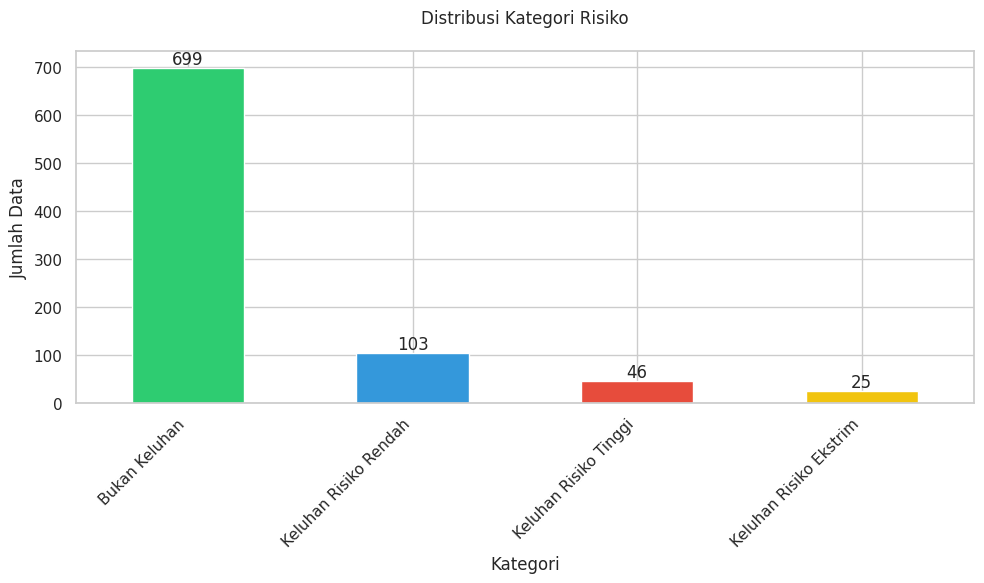


Statistik Detail:
Total data: 873

Distribusi per kategori:
Bukan Keluhan            : 699 (80.07%)
Keluhan Risiko Rendah    : 103 (11.80%)
Keluhan Risiko Tinggi    :  46 (5.27%)
Keluhan Risiko Ekstrim   :  25 (2.86%)

Rasio imbalance:
Majority vs Minority: 27.96


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca dataset hasil pelabelan
df = pd.read_csv('/content/drive/MyDrive/DATA/labeled_dataset_2024.csv')

# Hitung distribusi kategori risiko
dist = df['risk_category'].value_counts()
print("Distribusi Kategori Risiko:")
print(dist)

# Visualisasi distribusi dengan bar chart
plt.figure(figsize=(10, 6))
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f']  # Warna bisa disesuaikan dengan urutan kategori
ax = dist.plot(kind='bar', color=colors)
plt.title('Distribusi Kategori Risiko', pad=20)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45, ha='right')

# Tambahkan label jumlah di atas tiap bar
for i, v in enumerate(dist):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Tampilkan statistik detail distribusi
total = len(df)
print("\nStatistik Detail:")
print("=" * 50)
print(f"Total data: {total}")
print("\nDistribusi per kategori:")
for category, count in dist.items():
    percentage = (count / total) * 100
    print(f"{category:<25}: {count:>3} ({percentage:.2f}%)")

# Hitung rasio imbalance (majority vs minority)
if dist.min() > 0:
    imbalance_ratio = dist.max() / dist.min()
    print("\nRasio imbalance:")
    print(f"Majority vs Minority: {imbalance_ratio:.2f}")
else:
    print("\nRasio imbalance tidak dapat dihitung karena ada kategori dengan jumlah 0.")


# PENGEMBANGAN MODEL INDOBERT -- belum FIX

ARSITEKTUR INDOBERT

In [66]:
# 🚀 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import torch
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import numpy as np
from tqdm import tqdm
import random

# 🔥 Cek ketersediaan GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Menggunakan device:", device)

# 🔹 Set global seed untuk reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# 🔹 Muat dataset dari CSV
dataset_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"
df = pd.read_csv(dataset_path)

# 🔹 Validasi kolom dataset
expected_columns = ['text', 'risk_category']
if not all(col in df.columns for col in expected_columns):
    raise ValueError(f"Dataset harus memiliki kolom {expected_columns}, ditemukan: {df.columns}")

# 🔹 Mapping kategori risiko ke angka
label_mapping = {
    "Bukan Keluhan": 0,
    "Keluhan Risiko Rendah": 1,
    "Keluhan Risiko Tinggi": 2,
    "Keluhan Risiko Ekstrim": 3
}
df['risk_category'] = df['risk_category'].map(label_mapping)

# 🔹 Custom Dataset Class
class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=64):
        self.texts = dataframe['text'].tolist()
        self.labels = dataframe['risk_category'].tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 🚀 Load tokenizer dan model IndoBERT
model_name = "indobenchmark/indobert-large-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)
model.to(device)

# 🔹 Dataset splitting
full_dataset = TextDataset(df, tokenizer, max_length=64)
dataset_size = len(full_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])
print(f"Jumlah data: Train={len(train_dataset)}, Validation={len(val_dataset)}, Test={len(test_dataset)}")

# 🔹 DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# 🔥 Optimizer dan scheduler
epochs = 10
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1 * total_steps), num_training_steps=total_steps)

# 🔹 Fungsi evaluasi
def evaluate(model, dataloader):
    model.eval()
    losses = []
    correct_predictions = 0
    total = 0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            losses.append(loss.item())
            preds = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            total += labels.size(0)

    return (correct_predictions.double() / total) * 100, np.mean(losses)

# 🔥 Training loop dengan Early Stopping
best_val_loss = float('inf')
patience = 2
patience_counter = 0

for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total = 0

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        total += labels.size(0)
        loop.set_postfix(loss=loss.item())

    train_acc = (correct_predictions.double() / total) * 100
    val_acc, val_loss = evaluate(model, val_loader)

    print(f"\nEpoch {epoch+1} Summary:")
    print(f"Training Loss: {total_loss/len(train_loader):.4f}, Training Accuracy: {train_acc:.2f}%")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        model.save_pretrained("indobert_best_model")
        tokenizer.save_pretrained("indobert_best_model")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Menggunakan device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-large-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Jumlah data: Train=611, Validation=130, Test=132


Epoch 1/10: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it, loss=0.271]



Epoch 1 Summary:
Training Loss: 1.2436, Training Accuracy: 44.84%
Validation Loss: 0.5791, Validation Accuracy: 81.54%


Epoch 2/10: 100%|██████████| 20/20 [00:20<00:00,  1.03s/it, loss=0.127]



Epoch 2 Summary:
Training Loss: 0.6057, Training Accuracy: 79.21%
Validation Loss: 0.5101, Validation Accuracy: 80.00%


Epoch 3/10: 100%|██████████| 20/20 [00:21<00:00,  1.06s/it, loss=0.895]



Epoch 3 Summary:
Training Loss: 0.4916, Training Accuracy: 82.65%
Validation Loss: 0.4843, Validation Accuracy: 79.23%


Epoch 4/10: 100%|██████████| 20/20 [00:20<00:00,  1.05s/it, loss=1.11]



Epoch 4 Summary:
Training Loss: 0.3924, Training Accuracy: 86.74%
Validation Loss: 0.4639, Validation Accuracy: 80.00%


Epoch 5/10: 100%|██████████| 20/20 [00:20<00:00,  1.04s/it, loss=0.172]



Epoch 5 Summary:
Training Loss: 0.2362, Training Accuracy: 93.45%
Validation Loss: 0.4381, Validation Accuracy: 80.77%


Epoch 6/10: 100%|██████████| 20/20 [00:20<00:00,  1.05s/it, loss=0.559]



Epoch 6 Summary:
Training Loss: 0.1644, Training Accuracy: 96.40%
Validation Loss: 0.4456, Validation Accuracy: 80.00%


Epoch 7/10: 100%|██████████| 20/20 [00:20<00:00,  1.05s/it, loss=0.378]



Epoch 7 Summary:
Training Loss: 0.0990, Training Accuracy: 97.87%
Validation Loss: 0.5464, Validation Accuracy: 78.46%
Early stopping triggered.


Training dan Validasi

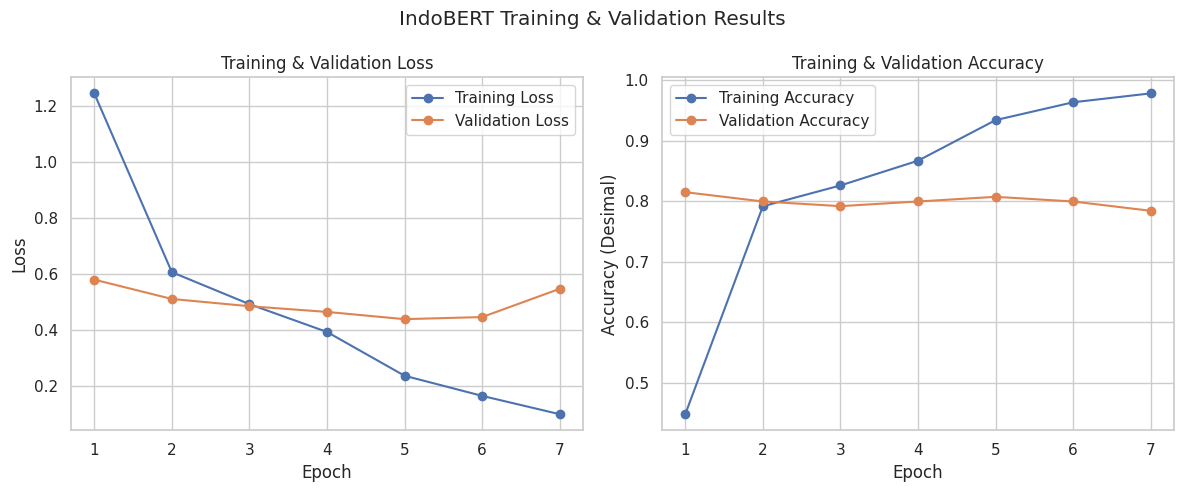

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
import matplotlib.pyplot as plt
from google.colab import files

# Data dari hasil training (sesuai log output) dengan format desimal
epochs = list(range(1, 8))
train_losses = [1.2436, 0.6057, 0.4916, 0.3924, 0.2362, 0.1644, 0.0990]
val_losses   = [0.5791, 0.5101, 0.4843, 0.4639, 0.4381, 0.4456, 0.5464]
train_accs   = [0.4484, 0.7921, 0.8265, 0.8674, 0.9345, 0.9640, 0.9787]  # Dibagi 100
val_accs     = [0.8154, 0.8000, 0.7923, 0.8000, 0.8077, 0.8000, 0.7846]  # Dibagi 100

# Buat figure dengan ukuran yang lebih besar
plt.figure(figsize=(12, 5))
plt.suptitle('IndoBERT Training & Validation Results')

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o', label='Training Loss')
plt.plot(epochs, val_losses, marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)

# Plot Training & Validation Accuracy (dalam format desimal)
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, marker='o', label='Training Accuracy')
plt.plot(epochs, val_accs, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (Desimal)')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Simpan grafik sebagai file PNG
plt.savefig("indobert_training_validation_plot_desimal.png", format="png")
plt.show()

# Unduh file PNG
files.download("indobert_training_validation_plot_desimal.png")


Evaluasi performa (akurasi, presisi, recall, F1-score)

Tabel Metrik Evaluasi:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value (%)
0,Accuracy,80.30
1,Precision (weighted),77.56
2,Recall (weighted),80.30
3,F1-score (weighted),78.91


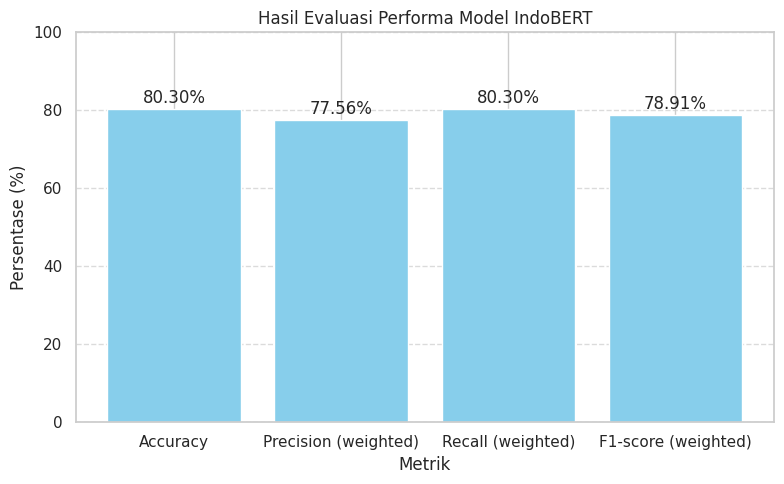

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📌 **Classification Report:**
                        precision    recall  f1-score   support

         Bukan Keluhan       0.91      0.94      0.92       113
 Keluhan Risiko Rendah       0.00      0.00      0.00        11
 Keluhan Risiko Tinggi       0.00      0.00      0.00         1
Keluhan Risiko Ekstrim       0.00      0.00      0.00         7

              accuracy                           0.80       132
             macro avg       0.23      0.23      0.23       132
          weighted avg       0.78      0.80      0.79       132



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from google.colab import files

# 📌 Fungsi Evaluasi pada Test Set
def evaluate_model(model, test_loader):
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels

# 🚀 Jalankan evaluasi
test_preds, test_labels = evaluate_model(model, test_loader)

# 📌 Hitung Metrik Evaluasi
accuracy = accuracy_score(test_labels, test_preds)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')

# -- Tampilkan dalam bentuk Tabel (DataFrame) --
data = {
    'Metric': [
        'Accuracy',
        'Precision (weighted)',
        'Recall (weighted)',
        'F1-score (weighted)'
    ],
    'Value (%)': [
        f"{accuracy*100:.2f}",
        f"{precision*100:.2f}",
        f"{recall*100:.2f}",
        f"{f1*100:.2f}"
    ]
}
df_metrics = pd.DataFrame(data)
print("Tabel Metrik Evaluasi:")
display(df_metrics)

# -- Tampilkan dalam bentuk grafik batang (bar chart) dan simpan sebagai file PNG --
plt.figure(figsize=(8, 5))
metrics = ['Accuracy', 'Precision (weighted)', 'Recall (weighted)', 'F1-score (weighted)']
values = [accuracy*100, precision*100, recall*100, f1*100]

bars = plt.bar(metrics, values, color='skyblue')

# Menambahkan nilai di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f"{height:.2f}%",
        ha='center',
        va='bottom'
    )

plt.ylim(0, 100)  # Batas atas sumbu y
plt.xlabel("Metrik")
plt.ylabel("Persentase (%)")
plt.title("Hasil Evaluasi Performa Model IndoBERT")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Simpan grafik sebagai file PNG
plt.savefig("evaluasi_model.png", format="png")

# Tampilkan grafik
plt.show()

# Unduh file PNG
files.download("evaluasi_model.png")

# 📌 Print Laporan Klasifikasi
print("\n📌 **Classification Report:**")
print(classification_report(test_labels, test_preds, target_names=list(label_mapping.keys())))


Analisis Confusion Matrix

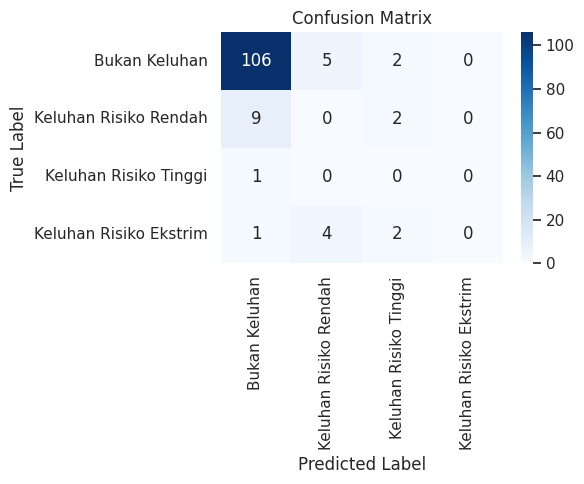

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# 📌 Buat Confusion Matrix
cm = confusion_matrix(test_labels, test_preds)
labels = list(label_mapping.keys())  # Nama kelas

# 📌 Visualisasi Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()  # Pastikan layout tidak terpotong

# Simpan confusion matrix sebagai file PNG
plt.savefig("confusion_matrix.png", format="png")

# Tampilkan plot
plt.show()

# Unduh file PNG
files.download("confusion_matrix.png")


# PENGEMBANGAN MODEL SVM

Arsitektur Model SVM

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# 🖥️ Import Library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📂 Path dataset baru
dataset_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"

# 📝 Load dataset CSV
df = pd.read_csv(dataset_path)

# 🔍 Cek kolom yang tersedia
print("Kolom dataset:", df.columns)

# 🚀 Pastikan dataset memiliki kolom yang sesuai
required_columns = {'text', 'risk_category'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Dataset harus memiliki kolom: {required_columns}")

# 🔢 Mapping label kategori risiko
label_mapping = {
    "Bukan Keluhan": 0,
    "Keluhan Risiko Rendah": 1,
    "Keluhan Risiko Tinggi": 2,
    "Keluhan Risiko Ekstrim": 3
}

df['risk_category'] = df['risk_category'].map(label_mapping)

# 🛠️ Split dataset menjadi train (70%), validation (15%), test (15%)
train_ratio, val_ratio = 0.7, 0.15  # 70% train, 15% validation, 15% test
train_size = int(len(df) * train_ratio)
val_size = int(len(df) * val_ratio)
test_size = len(df) - train_size - val_size

train_df, val_df, test_df = np.split(df.sample(frac=1, random_state=42), [train_size, train_size + val_size])

print("Jumlah data:")
print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

# Gabungkan data train dan validation
combined_train = pd.concat([train_df, val_df], ignore_index=True)

# Ekstrak fitur dan label
X_train = combined_train['text']
y_train = combined_train['risk_category']
X_test = test_df['text']
y_test = test_df['risk_category']

# Vektorisasi teks dengan TF-IDF (ngram_range: unigram hingga trigram)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Definisikan parameter grid untuk SVM dengan kernel RBF
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

# Inisialisasi model SVM dengan class_weight='balanced'
svm = SVC(class_weight='balanced')

# Lakukan grid search dengan validasi silang 5-fold
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Tampilkan parameter terbaik dan akurasi cross-validation
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Gunakan model terbaik untuk prediksi pada test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_tfidf)

# Evaluasi performa model
acc = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.2f}%".format(acc * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Kolom dataset: Index(['publishedAtDate', 'stars', 'text', 'processed_text', 'text_length',
       'sentiment_score', 'risk_score', 'total_score', 'risk_category'],
      dtype='object')
Jumlah data:
Train: 611, Validation: 130, Test: 132
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 82.05%
Test Set Accuracy: 81.82%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       102
           1       0.83      0.21      0.33        24
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         1

    accuracy                           0.82       132
   macro avg       0.48      0.35      0.37       132
weighted avg       0.81      0.82      0.77       132

Confusion Matrix:
[[102   0   0   0]
 [ 16   5   3   0]
 [  4   0   1   0]
 [  0   1   0   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hasil Training dan Validasi

Kolom dataset: Index(['publishedAtDate', 'stars', 'text', 'processed_text', 'text_length',
       'sentiment_score', 'risk_score', 'total_score', 'risk_category'],
      dtype='object')
Jumlah data:
Train: 611, Validation: 131, Test: 131
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 81.94%

--- Cross-Validation Results ---
Training scores per fold: [0.99831366 0.99831366 0.996633   0.99494949 0.9983165 ]
Validation scores per fold: [0.82550336 0.82550336 0.80405405 0.82432432 0.81756757]
Rata-rata Training Accuracy: 99.73%
Rata-rata Validation Accuracy: 81.94%


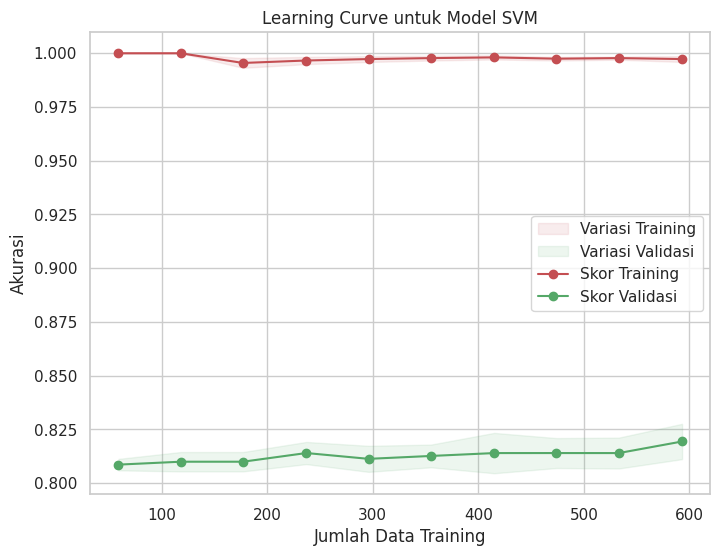

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- Evaluasi pada Test Set ---
Test Set Accuracy: 85.50%

Classification Report:
                        precision    recall  f1-score   support

         Bukan Keluhan       0.91      0.98      0.95       106
 Keluhan Risiko Rendah       0.50      0.54      0.52        13
 Keluhan Risiko Tinggi       0.33      0.11      0.17         9
Keluhan Risiko Ekstrim       0.00      0.00      0.00         3

              accuracy                           0.85       131
             macro avg       0.44      0.41      0.41       131
          weighted avg       0.81      0.85      0.83       131

Confusion Matrix:
[[104   2   0   0]
 [  6   7   0   0]
 [  4   4   1   0]
 [  0   1   2   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
# 🖥️ Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

# -----------------------------
# 1. Pemuatan Data dan Vektorisasi
# -----------------------------
# 📂 Path dataset baru
dataset_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"

# 📝 Load dataset CSV
df = pd.read_csv(dataset_path)

# 🔍 Cek kolom yang tersedia
print("Kolom dataset:", df.columns)

# 🚀 Pastikan dataset memiliki kolom yang sesuai
required_columns = {'text', 'risk_category'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Dataset harus memiliki kolom: {required_columns}")

# 🔢 Mapping label kategori risiko
label_mapping = {
    "Bukan Keluhan": 0,
    "Keluhan Risiko Rendah": 1,
    "Keluhan Risiko Tinggi": 2,
    "Keluhan Risiko Ekstrim": 3
}
df['risk_category'] = df['risk_category'].map(label_mapping)

# 🛠️ Split dataset menjadi 70% train, 15% validation, dan 15% test
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['risk_category'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['risk_category'])

print("Jumlah data:")
print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

# Gabungkan data train dan validation untuk proses Grid Search dan learning curve
combined_train = pd.concat([train_df, val_df], ignore_index=True)
X_train = combined_train['text']
y_train = combined_train['risk_category']
X_test = test_df['text']
y_test = test_df['risk_category']

# Vektorisasi teks dengan TF-IDF (ngram_range: unigram hingga trigram, max_features: 10,000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# -----------------------------
# 2. Grid Search dan Model SVM
# -----------------------------
# Definisikan parameter grid untuk SVM dengan kernel RBF
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

# Inisialisasi model SVM dengan class_weight='balanced'
svm = SVC(class_weight='balanced')

# Lakukan grid search dengan validasi silang 5-fold
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Tampilkan parameter terbaik dan akurasi cross-validation
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Dapatkan model terbaik
best_svm = grid_search.best_estimator_

# -----------------------------
# 3. Hasil Training dan Validasi (Cross-Validation)
# -----------------------------
cv_results = cross_validate(
    best_svm,
    X_train_tfidf,
    y_train,
    cv=5,
    return_train_score=True,
    scoring='accuracy',
    n_jobs=-1
)

print("\n--- Cross-Validation Results ---")
print("Training scores per fold:", cv_results['train_score'])
print("Validation scores per fold:", cv_results['test_score'])
print("Rata-rata Training Accuracy: {:.2f}%".format(np.mean(cv_results['train_score']) * 100))
print("Rata-rata Validation Accuracy: {:.2f}%".format(np.mean(cv_results['test_score']) * 100))

# -----------------------------
# 4. Plot Learning Curve
# -----------------------------
train_sizes, train_scores, val_scores = learning_curve(
    best_svm,
    X_train_tfidf,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r", label="Variasi Training")
plt.fill_between(train_sizes,
                 val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std,
                 alpha=0.1, color="g", label="Variasi Validasi")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Skor Training")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Skor Validasi")
plt.xlabel("Jumlah Data Training")
plt.ylabel("Akurasi")
plt.title("Learning Curve untuk Model SVM")
plt.legend(loc="best")
plt.grid(True)

# Simpan gambar sebagai PNG sebelum menampilkannya
plt.savefig('learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Download file learning_curve.png (khusus Google Colab)
files.download('learning_curve.png')

# -----------------------------
# 5. Evaluasi Model pada Test Set
# -----------------------------
y_pred = best_svm.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)
print("\n--- Evaluasi pada Test Set ---")
print("Test Set Accuracy: {:.2f}%".format(acc * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=list(label_mapping.keys())))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Evaluasi performa (akurasi, presisi, recall, F1-score)


--- Evaluasi Performa pada Test Set ---
Test Set Accuracy: 85.50%
Precision (weighted): 0.81
Recall (weighted): 0.85
F1-score (weighted): 0.83


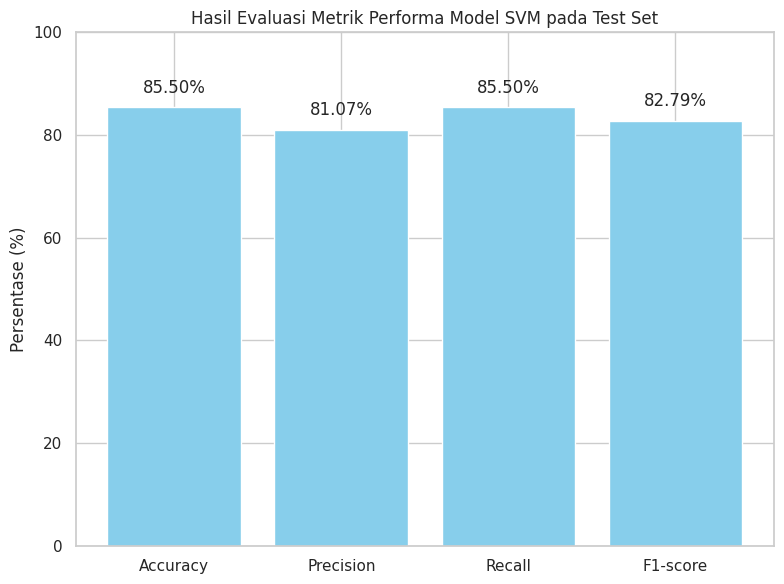

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pastikan bahwa y_test dan y_pred sudah tersedia, misalnya:
# y_pred = best_svm.predict(X_test_tfidf)

# Hitung metrik evaluasi secara terpisah
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Tampilkan hasil evaluasi di konsol
print("\n--- Evaluasi Performa pada Test Set ---")
print("Test Set Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision (weighted): {:.2f}".format(precision))
print("Recall (weighted): {:.2f}".format(recall))
print("F1-score (weighted): {:.2f}".format(f1))

# Buat dictionary untuk metrik
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

# Buat grafik batang untuk menampilkan metrik dalam persentase
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(metrics.keys(), [v * 100 for v in metrics.values()], color='skyblue')
ax.set_ylim(0, 100)
ax.set_ylabel('Persentase (%)')
ax.set_title('Hasil Evaluasi Metrik Performa Model SVM pada Test Set')

# Tambahkan nilai persentase di atas setiap batang
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.2f}%',
            ha='center', va='bottom', fontsize=12)

plt.tight_layout()

# Simpan grafik sebagai file PNG dan tampilkan
plt.savefig("evaluation_metrics.png", dpi=300, bbox_inches='tight')
plt.show()

# Jika menggunakan Google Colab, Anda bisa mendownload file PNG dengan:
# from google.colab import files
# files.download("evaluation_metrics.png")


Analisis Confusion Matrix

Confusion Matrix:
[[104   2   0   0]
 [  6   7   0   0]
 [  4   4   1   0]
 [  0   1   2   0]]


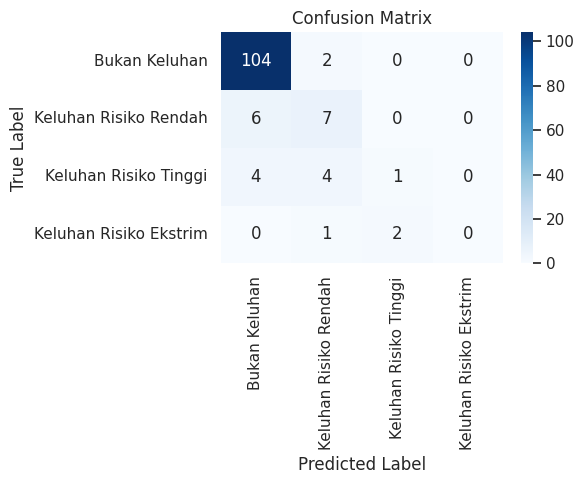

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from google.colab import files

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tentukan label kelas berdasarkan mapping yang telah didefinisikan
class_names = list(label_mapping.keys())

# Tampilkan nilai confusion matrix pada console
print("Confusion Matrix:")
print(cm)

# Visualisasikan confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()  # Pastikan layout tidak terpotong

# Simpan grafik sebagai file PNG dengan resolusi tinggi
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# Jika menggunakan Google Colab, unduh file PNG
files.download("confusion_matrix.png")


#PENGEMBANGAN MODEL ENSEMBLE

ARSITEKTUR MODEL ENSEMBLE


In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Pastikan Google Drive sudah ter-mount jika diperlukan (uncomment jika perlu)
# from google.colab import drive
# drive.mount('/content/drive')

# Install library yang diperlukan
!pip install transformers datasets evaluate imblearn --quiet

# Import libraries
import pandas as pd
import numpy as np
import torch
import evaluate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 1. Muat dataset
data_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"
df = pd.read_csv(data_path)
print("Kolom dataset:", df.columns)
# Gunakan kolom 'text' dan 'risk_category'
df = df[['text', 'risk_category']]

# Encode label menjadi numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['risk_category'])
print("Kelas:", le.classes_)

# 2. Split data secara stratified: 70% training, 15% validasi, 15% test
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, stratify=df['label'])
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

# Reset index untuk memastikan indeks yang rapi
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df  = test_df.reset_index(drop=True)

print("Jumlah data training:", len(train_df))
print("Jumlah data validasi:", len(valid_df))
print("Jumlah data test:", len(test_df))

# 3. Fine-tuning IndoBERT untuk klasifikasi dengan Hugging Face Trainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

model_name = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Konversi DataFrame ke Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df[['text', 'label']])
valid_dataset = Dataset.from_pandas(valid_df[['text', 'label']])
test_dataset  = Dataset.from_pandas(test_df[['text', 'label']])

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
valid_dataset = valid_dataset.map(tokenize_function, batched=True)
test_dataset  = test_dataset.map(tokenize_function, batched=True)

# Rename kolom 'label' menjadi 'labels'
train_dataset = train_dataset.rename_column("label", "labels")
valid_dataset = valid_dataset.rename_column("label", "labels")
test_dataset  = test_dataset.rename_column("label", "labels")

# Set format untuk PyTorch
train_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
valid_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])

# Load model IndoBERT untuk klasifikasi (sesuaikan num_labels)
num_labels = len(le.classes_)
model_indobert = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

# Training arguments dengan 10 epoch dan non-reporting wandb
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to=[]  # Nonaktifkan reporting (misalnya, wandb)
)

# Compute metrics untuk evaluasi
accuracy_metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Buat Trainer dengan validasi terpisah
trainer = Trainer(
    model=model_indobert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics
)

# Fine-tuning IndoBERT
trainer.train()

# Evaluasi IndoBERT pada test set
results_indobert = trainer.evaluate(test_dataset)
print("Hasil Evaluasi IndoBERT:", results_indobert)

# Dapatkan output probabilitas IndoBERT pada test set
indobert_preds = trainer.predict(test_dataset)
indobert_probs = torch.nn.functional.softmax(torch.tensor(indobert_preds.predictions), dim=-1).numpy()

# 4. Membangun Model SVM dengan TF-IDF dan SMOTE
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
X_train_tfidf = vectorizer.fit_transform(train_df['text'])
X_valid_tfidf = vectorizer.transform(valid_df['text'])
X_test_tfidf = vectorizer.transform(test_df['text'])

# Terapkan SMOTE pada data training
smote = SMOTE(random_state=42)
X_train_tfidf_res, y_train_res = smote.fit_resample(X_train_tfidf, train_df['label'])
print("Ukuran data training setelah SMOTE:", X_train_tfidf_res.shape)

# Optimasi SVM dengan Grid Search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
svm = SVC(kernel='rbf', probability=True)
grid = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_tfidf_res, y_train_res)
best_svm = grid.best_estimator_
print("Parameter SVM Terbaik:", grid.best_params_)

# Prediksi probabilitas SVM pada test set (data test tetap original)
svm_probs = best_svm.predict_proba(X_test_tfidf)

# 5. Pengembangan Model Ensemble
# 5.1 Stacking: Gabungkan probabilitas dari IndoBERT dan SVM sebagai fitur untuk meta-learner
X_meta = np.hstack([indobert_probs, svm_probs])
y_meta = test_df['label'].values

meta_learner = LogisticRegression(max_iter=1000)
meta_learner.fit(X_meta, y_meta)
ensemble_preds_stack = meta_learner.predict(X_meta)
acc_stack = accuracy_score(y_meta, ensemble_preds_stack)
print("Akurasi Ensemble (Stacking):", acc_stack)
print(classification_report(y_meta, ensemble_preds_stack, target_names=le.classes_))

# 5.2 Voting: Gabungkan probabilitas secara sederhana dengan penjumlahan dan ambil argmax
vote_preds = np.argmax(indobert_probs + svm_probs, axis=1)
acc_vote = accuracy_score(y_meta, vote_preds)
print("Akurasi Ensemble (Voting):", acc_vote)
print(classification_report(y_meta, vote_preds, target_names=le.classes_))

# 5.3 Weighted Voting: Terapkan bobot pada masing-masing model (misal, w1 = 0.55 untuk IndoBERT dan w2 = 0.45 untuk SVM)
w1, w2 = 0.55, 0.45
weighted_vote_preds = np.argmax(w1 * indobert_probs + w2 * svm_probs, axis=1)
acc_weighted_vote = accuracy_score(y_meta, weighted_vote_preds)
print("Akurasi Ensemble (Weighted Voting):", acc_weighted_vote)
print(classification_report(y_meta, weighted_vote_preds, target_names=le.classes_))


Kolom dataset: Index(['publishedAtDate', 'stars', 'text', 'processed_text', 'text_length',
       'sentiment_score', 'risk_score', 'total_score', 'risk_category'],
      dtype='object')
Kelas: ['Bukan Keluhan' 'Keluhan Risiko Ekstrim' 'Keluhan Risiko Rendah'
 'Keluhan Risiko Tinggi']
Jumlah data training: 611
Jumlah data validasi: 131
Jumlah data test: 131


Map:   0%|          | 0/611 [00:00<?, ? examples/s]

Map:   0%|          | 0/131 [00:00<?, ? examples/s]

Map:   0%|          | 0/131 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.436324,0.824427
2,No log,0.372630,0.839695
3,0.480600,0.442276,0.839695
4,0.480600,0.408529,0.847328
5,0.218500,0.429616,0.839695
6,0.218500,0.452468,0.839695
7,0.218500,0.488092,0.839695
8,0.090700,0.499722,0.832061
9,0.090700,0.507689,0.839695
10,0.032700,0.510358,0.839695


Hasil Evaluasi IndoBERT: {'eval_loss': 0.5151075720787048, 'eval_accuracy': 0.8320610687022901, 'eval_runtime': 0.8383, 'eval_samples_per_second': 156.271, 'eval_steps_per_second': 5.965, 'epoch': 10.0}
Ukuran data training setelah SMOTE: (1976, 10000)
Parameter SVM Terbaik: {'C': 10, 'gamma': 1}
Akurasi Ensemble (Stacking): 0.8396946564885496
                        precision    recall  f1-score   support

         Bukan Keluhan       0.90      0.98      0.94       106
Keluhan Risiko Ekstrim       0.00      0.00      0.00         4
 Keluhan Risiko Rendah       0.40      0.46      0.43        13
 Keluhan Risiko Tinggi       0.00      0.00      0.00         8

              accuracy                           0.84       131
             macro avg       0.32      0.36      0.34       131
          weighted avg       0.77      0.84      0.80       131

Akurasi Ensemble (Voting): 0.8091603053435115
                        precision    recall  f1-score   support

         Bukan Keluhan      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TRAINING DAN VALIDASI

In [50]:
# Pastikan Google Drive sudah ter-mount jika diperlukan (uncomment jika perlu)
# from google.colab import drive
# drive.mount('/content/drive')

# Install library yang diperlukan
!pip install transformers datasets evaluate imblearn --quiet

# Import libraries
import pandas as pd
import numpy as np
import torch
import evaluate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 1. Muat dataset
data_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"
df = pd.read_csv(data_path)
print("Kolom dataset:", df.columns)
# Gunakan kolom 'text' dan 'risk_category'
df = df[['text', 'risk_category']]

# Encode label menjadi numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['risk_category'])
print("Kelas:", le.classes_)

# 2. Split data secara stratified: 70% training, 15% validasi, 15% test
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, stratify=df['label'])
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

# Reset index untuk memastikan indeks yang rapi
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df  = test_df.reset_index(drop=True)

print("Jumlah data training:", len(train_df))
print("Jumlah data validasi:", len(valid_df))
print("Jumlah data test:", len(test_df))

# 3. Fine-tuning IndoBERT untuk klasifikasi dengan Hugging Face Trainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

model_name = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Konversi DataFrame ke Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df[['text', 'label']])
valid_dataset = Dataset.from_pandas(valid_df[['text', 'label']])
test_dataset  = Dataset.from_pandas(test_df[['text', 'label']])

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
valid_dataset = valid_dataset.map(tokenize_function, batched=True)
test_dataset  = test_dataset.map(tokenize_function, batched=True)

# Rename kolom 'label' menjadi 'labels'
train_dataset = train_dataset.rename_column("label", "labels")
valid_dataset = valid_dataset.rename_column("label", "labels")
test_dataset  = test_dataset.rename_column("label", "labels")

# Set format untuk PyTorch
train_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
valid_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])

# Load model IndoBERT untuk klasifikasi (sesuaikan num_labels)
num_labels = len(le.classes_)
model_indobert = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

# Training arguments dengan 10 epoch dan non-reporting wandb
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to=[]  # Nonaktifkan reporting (misalnya, wandb)
)

# Compute metrics untuk evaluasi IndoBERT
accuracy_metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Buat Trainer dengan validasi terpisah
trainer = Trainer(
    model=model_indobert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics
)

# Training IndoBERT
trainer.train()

# Evaluasi IndoBERT pada test set
results_indobert = trainer.evaluate(test_dataset)
print("Hasil Evaluasi IndoBERT:", results_indobert)

# Dapatkan output probabilitas IndoBERT pada test set
indobert_preds = trainer.predict(test_dataset)
indobert_probs = torch.nn.functional.softmax(torch.tensor(indobert_preds.predictions), dim=-1).numpy()

# 4. Membangun Model SVM dengan TF-IDF dan SMOTE
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
X_train_tfidf = vectorizer.fit_transform(train_df['text'])
X_valid_tfidf = vectorizer.transform(valid_df['text'])
X_test_tfidf = vectorizer.transform(test_df['text'])

# Terapkan SMOTE pada data training untuk mengatasi ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_train_tfidf_res, y_train_res = smote.fit_resample(X_train_tfidf, train_df['label'])
print("Ukuran data training setelah SMOTE:", X_train_tfidf_res.shape)

# Optimasi SVM dengan Grid Search menggunakan data training yang sudah di-resample
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
svm = SVC(kernel='rbf', probability=True)
grid = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_tfidf_res, y_train_res)
best_svm = grid.best_estimator_
print("Parameter SVM Terbaik:", grid.best_params_)

# Prediksi probabilitas SVM pada test set (data test tetap original)
svm_probs = best_svm.predict_proba(X_test_tfidf)

# 5. Pengembangan Model Ensemble
# -------------------------------------------------------------
# Untuk tahap ensemble, kita akan menggunakan prediksi dari kedua model:
# - Gunakan validasi untuk melatih meta learner (stacking)
# - Gunakan test set untuk evaluasi meta learner
# -------------------------------------------------------------

# 5.1 Training Meta Learner (Stacking) menggunakan Validasi sebagai Meta Training Set
# Dapatkan prediksi probabilitas IndoBERT pada validasi
indobert_preds_valid = trainer.predict(valid_dataset)
indobert_probs_valid = torch.nn.functional.softmax(torch.tensor(indobert_preds_valid.predictions), dim=-1).numpy()

# Dapatkan prediksi probabilitas SVM pada validasi
svm_probs_valid = best_svm.predict_proba(X_valid_tfidf)

# Gabungkan probabilitas sebagai fitur meta untuk training
X_meta_train = np.hstack([indobert_probs_valid, svm_probs_valid])
y_meta_train = valid_df['label'].values

# Latih meta learner (misal: Logistic Regression)
meta_learner = LogisticRegression(max_iter=1000)
meta_learner.fit(X_meta_train, y_meta_train)

# 5.2 Evaluasi Meta Learner pada Test Set
# Gabungkan prediksi dari IndoBERT dan SVM pada test set
X_meta_test = np.hstack([indobert_probs, svm_probs])
y_meta_test = test_df['label'].values

ensemble_preds_stack = meta_learner.predict(X_meta_test)
acc_stack = accuracy_score(y_meta_test, ensemble_preds_stack)
print("Akurasi Ensemble (Stacking):", acc_stack)
print(classification_report(y_meta_test, ensemble_preds_stack, target_names=le.classes_))

# 5.3 Voting: Gabungkan probabilitas secara sederhana dari kedua model dan ambil argmax
vote_preds = np.argmax(indobert_probs + svm_probs, axis=1)
acc_vote = accuracy_score(y_meta_test, vote_preds)
print("Akurasi Ensemble (Voting):", acc_vote)
print(classification_report(y_meta_test, vote_preds, target_names=le.classes_))

# 5.4 Weighted Voting: Terapkan bobot pada masing-masing model (misal, w1 = 0.55 untuk IndoBERT dan w2 = 0.45 untuk SVM)
w1, w2 = 0.55, 0.45
weighted_vote_preds = np.argmax(w1 * indobert_probs + w2 * svm_probs, axis=1)
acc_weighted_vote = accuracy_score(y_meta_test, weighted_vote_preds)
print("Akurasi Ensemble (Weighted Voting):", acc_weighted_vote)
print(classification_report(y_meta_test, weighted_vote_preds, target_names=le.classes_))


Kolom dataset: Index(['publishedAtDate', 'stars', 'text', 'processed_text', 'text_length',
       'sentiment_score', 'risk_score', 'total_score', 'risk_category'],
      dtype='object')
Kelas: ['Bukan Keluhan' 'Keluhan Risiko Ekstrim' 'Keluhan Risiko Rendah'
 'Keluhan Risiko Tinggi']
Jumlah data training: 611
Jumlah data validasi: 131
Jumlah data test: 131


Map:   0%|          | 0/611 [00:00<?, ? examples/s]

Map:   0%|          | 0/131 [00:00<?, ? examples/s]

Map:   0%|          | 0/131 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.468311,0.824427
2,No log,0.371972,0.839695
3,0.491700,0.411030,0.839695
4,0.491700,0.383903,0.832061
5,0.201800,0.410506,0.824427
6,0.201800,0.441589,0.824427
7,0.201800,0.419515,0.839695
8,0.080900,0.449881,0.816794
9,0.080900,0.462494,0.824427
10,0.027500,0.465356,0.816794


Hasil Evaluasi IndoBERT: {'eval_loss': 0.43001192808151245, 'eval_accuracy': 0.816793893129771, 'eval_runtime': 0.8558, 'eval_samples_per_second': 153.081, 'eval_steps_per_second': 5.843, 'epoch': 10.0}
Ukuran data training setelah SMOTE: (1976, 10000)
Parameter SVM Terbaik: {'C': 10, 'gamma': 1}


Akurasi Ensemble (Stacking): 0.8549618320610687
                        precision    recall  f1-score   support

         Bukan Keluhan       0.90      1.00      0.95       106
Keluhan Risiko Ekstrim       0.00      0.00      0.00         4
 Keluhan Risiko Rendah       0.50      0.46      0.48        13
 Keluhan Risiko Tinggi       0.00      0.00      0.00         8

              accuracy                           0.85       131
             macro avg       0.35      0.37      0.36       131
          weighted avg       0.78      0.85      0.81       131

Akurasi Ensemble (Voting): 0.8091603053435115
                        precision    recall  f1-score   support

         Bukan Keluhan       0.82      1.00      0.90       106
Keluhan Risiko Ekstrim       0.00      0.00      0.00         4
 Keluhan Risiko Rendah       0.00      0.00      0.00        13
 Keluhan Risiko Tinggi       0.00      0.00      0.00         8

              accuracy                           0.81       131
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Evaluasi performa (akurasi, presisi, recall, F1-score)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Evaluasi Performa Ensemble Model\n")

# Evaluasi untuk Stacking Ensemble
print("=== Stacking Ensemble ===")
acc_stack = accuracy_score(y_meta_test, ensemble_preds_stack)
precision_stack = precision_score(y_meta_test, ensemble_preds_stack, average='weighted')
recall_stack = recall_score(y_meta_test, ensemble_preds_stack, average='weighted')
f1_stack = f1_score(y_meta_test, ensemble_preds_stack, average='weighted')

print("Akurasi    :", acc_stack)
print("Presisi    :", precision_stack)
print("Recall     :", recall_stack)
print("F1 Score   :", f1_stack)
print("Classification Report:\n", classification_report(y_meta_test, ensemble_preds_stack, target_names=le.classes_))
print("\n")

# Evaluasi untuk Voting Ensemble
print("=== Voting Ensemble ===")
acc_vote = accuracy_score(y_meta_test, vote_preds)
precision_vote = precision_score(y_meta_test, vote_preds, average='weighted')
recall_vote = recall_score(y_meta_test, vote_preds, average='weighted')
f1_vote = f1_score(y_meta_test, vote_preds, average='weighted')

print("Akurasi    :", acc_vote)
print("Presisi    :", precision_vote)
print("Recall     :", recall_vote)
print("F1 Score   :", f1_vote)
print("Classification Report:\n", classification_report(y_meta_test, vote_preds, target_names=le.classes_))
print("\n")

# Evaluasi untuk Weighted Voting Ensemble
print("=== Weighted Voting Ensemble ===")
acc_weighted_vote = accuracy_score(y_meta_test, weighted_vote_preds)
precision_weighted_vote = precision_score(y_meta_test, weighted_vote_preds, average='weighted')
recall_weighted_vote = recall_score(y_meta_test, weighted_vote_preds, average='weighted')
f1_weighted_vote = f1_score(y_meta_test, weighted_vote_preds, average='weighted')

print("Akurasi    :", acc_weighted_vote)
print("Presisi    :", precision_weighted_vote)
print("Recall     :", recall_weighted_vote)
print("F1 Score   :", f1_weighted_vote)
print("Classification Report:\n", classification_report(y_meta_test, weighted_vote_preds, target_names=le.classes_))


Evaluasi Performa Ensemble Model

=== Stacking Ensemble ===
Akurasi    : 0.8549618320610687
Presisi    : 0.7764911372751974
Recall     : 0.8549618320610687
F1 Score   : 0.8134460196292257
Classification Report:
                         precision    recall  f1-score   support

         Bukan Keluhan       0.90      1.00      0.95       106
Keluhan Risiko Ekstrim       0.00      0.00      0.00         4
 Keluhan Risiko Rendah       0.50      0.46      0.48        13
 Keluhan Risiko Tinggi       0.00      0.00      0.00         8

              accuracy                           0.85       131
             macro avg       0.35      0.37      0.36       131
          weighted avg       0.78      0.85      0.81       131



=== Voting Ensemble ===
Akurasi    : 0.8091603053435115
Presisi    : 0.664891413693118
Recall     : 0.8091603053435115
F1 Score   : 0.7299658924801039
Classification Report:
                         precision    recall  f1-score   support

         Bukan Keluhan       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [48]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Buat DataLoader untuk test set (batch size bisa disesuaikan)
test_dataloader = DataLoader(test_dataset, batch_size=32)

# Set model ke mode evaluasi
model_indobert.eval()
all_preds = []
all_labels = []

# Nonaktifkan perhitungan gradien
with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_indobert(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Hitung metrik evaluasi
acc = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

print("Test Accuracy: {:.4f}".format(acc))
print("Test Precision: {:.4f}".format(precision))
print("Test Recall: {:.4f}".format(recall))
print("Test F1-score: {:.4f}".format(f1))
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=le.classes_, zero_division=0))


Test Accuracy: 0.8397
Test Precision: 0.8113
Test Recall: 0.8397
Test F1-score: 0.8221

Classification Report:
                        precision    recall  f1-score   support

         Bukan Keluhan       0.92      0.96      0.94       106
Keluhan Risiko Ekstrim       1.00      0.50      0.67         4
 Keluhan Risiko Rendah       0.38      0.46      0.41        13
 Keluhan Risiko Tinggi       0.00      0.00      0.00         8

              accuracy                           0.84       131
             macro avg       0.57      0.48      0.51       131
          weighted avg       0.81      0.84      0.82       131



CONFUSION MATRIX

Confusion Matrix - Stacking Ensemble:
[[106   0   0   0]
 [  1   0   2   1]
 [  7   0   6   0]
 [  4   0   4   0]]


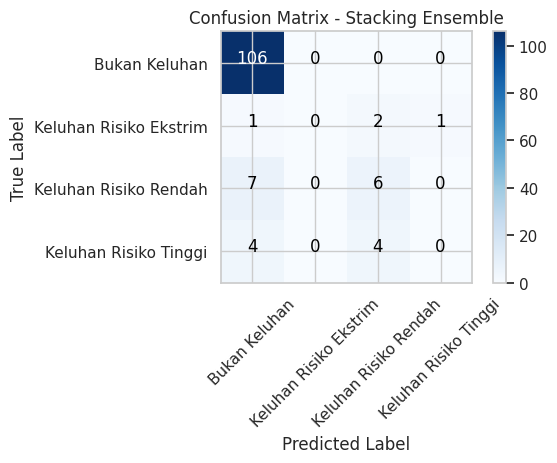

Confusion Matrix - Voting Ensemble:
[[106   0   0   0]
 [  3   0   0   1]
 [ 13   0   0   0]
 [  7   0   1   0]]


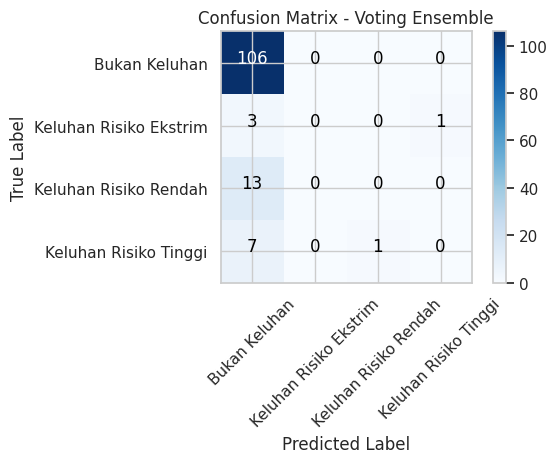

Confusion Matrix - Weighted Voting Ensemble:
[[106   0   0   0]
 [  3   0   0   1]
 [ 13   0   0   0]
 [  7   0   1   0]]


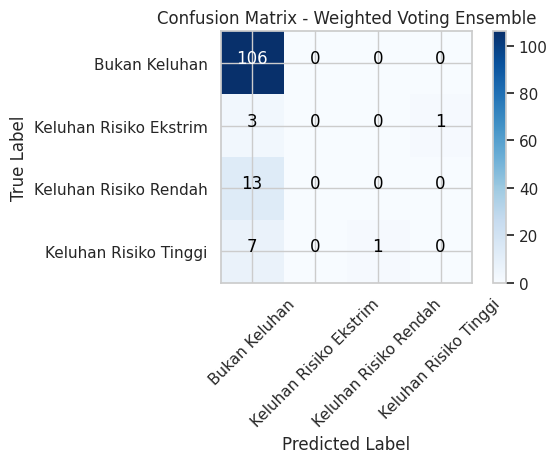

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Fungsi untuk memplot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(le.classes_))
    plt.xticks(tick_marks, le.classes_, rotation=45)
    plt.yticks(tick_marks, le.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    # Tambahkan angka pada setiap sel
    for i in range(len(cm)):
        for j in range(len(cm)):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > cm.max() / 2. else "black")
    plt.tight_layout()
    plt.show()

# 1. Confusion Matrix untuk Stacking Ensemble
cm_stack = confusion_matrix(y_meta_test, ensemble_preds_stack)
print("Confusion Matrix - Stacking Ensemble:")
print(cm_stack)
plot_confusion_matrix(cm_stack, "Confusion Matrix - Stacking Ensemble")

# 2. Confusion Matrix untuk Voting Ensemble
cm_vote = confusion_matrix(y_meta_test, vote_preds)
print("Confusion Matrix - Voting Ensemble:")
print(cm_vote)
plot_confusion_matrix(cm_vote, "Confusion Matrix - Voting Ensemble")

# 3. Confusion Matrix untuk Weighted Voting Ensemble
cm_weighted_vote = confusion_matrix(y_meta_test, weighted_vote_preds)
print("Confusion Matrix - Weighted Voting Ensemble:")
print(cm_weighted_vote)
plot_confusion_matrix(cm_weighted_vote, "Confusion Matrix - Weighted Voting Ensemble")
